# **Lab session 1**
## **Exercise 1 : Implementation of the XOR (eXclusive OR) function**
In this exercise we will create a neural network model approximating the XOR function. The XOR function is impossible to approximate with linear classifiers.
We will use a perceptron with one hidden and one output layer.

Implement the XOR function. XOR is a two-input binary function that outputs 1 when the inputs are different, and 0 otherwise.
Use the != operator to generate the table of XOR.

O and 0, 0 and 1, 1 and 0, 1 and 1

**(This assignment contains examples of results you should be able to reproduce with your code.)**

In [221]:
import numpy as np
X = np.array(((0,0),(0,1),(1,0),(1,1)))
Y= np.double(X[:,0]!=X[:,1]).reshape(4)
print("X= ",X)
print("Y= ",Y)

X=  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Y=  [0. 1. 1. 0.]


(-0.5, 1.5, -0.5, 1.5)

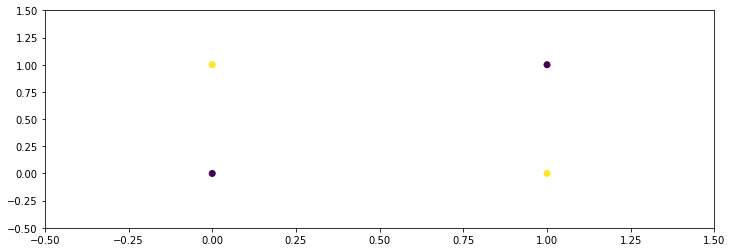

In [222]:
from matplotlib import pyplot as plt
plt.scatter (X[:,0],X[:,1],c=Y)
plt.axis([-.5,1.5,-.5,1.5])

We cannot use a linear classifier on the four points because we have no linear separation of the four points.

The perceptron is not a maximal-margin classifier. We would encounter convergence issues with sparsely distributed examples. Replicate the data (use **numpy.tile()** function) and add some noise to ease the convergence ( use **numpy.random.randn()** function).

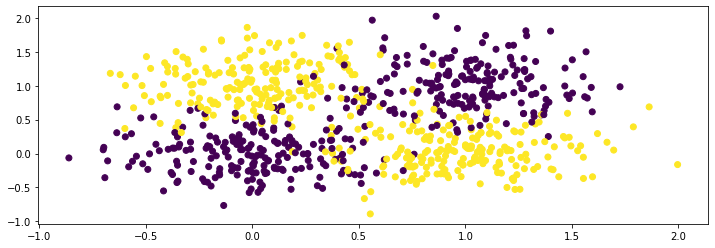

In [223]:
X = np.double(np.tile(X,(200,1)))
Y = np.tile(Y,200)
X += .3*np.random.randn(X.shape[0],X.shape[1])
plt.scatter (X[:,0],X[:,1],c=Y)


Convert the target into the matrix 'y' in one-hot format.
This will allow the predictors output one at a time using the soft-max activation. What is the shape of the 'y' matrix. Use the **keras** function **utils.to_categorical()**.

We will replicate the data and add noise to it (data augmentation)

In [224]:
import keras
Y = keras.utils.to_categorical(Y, len(np.unique(Y)))


## Prepare the train and test dataset.

1.   split dataset into test and train dataset.
2.   split further the train dataset into train and validation part
Use the **sklearn.model_selection** function **train_test_split()** to separate a dataset. You can choose the percentage of the split, or leave the defaut value.

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=20)


## create the model

1.   The model will be the keras sequential model containing one hidden and one output layer.
Instantiate the model using **model=Sequential()**, then add two **Dense()** layers from **keras.layers**. Adding layers can be done using the model's class function **model.add()**.
For the hidden (the first) layer, specify the input shape, and for the output layer the number of classes to output. Use the relu activation in the hidden layer and the softmax for the output layer?
2.   Compile the model. Specify the loss (use **categorical_entropy**). Choose an optimizer and the evaluation metrics (use **accuracy**) to use. Use the class function **compile()** of the sequential model you have created.



In [226]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(6, input_shape=X[0].shape, activation='relu'))
model.add(Dense(len(np.unique(Y)), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


## train the model

You need to specify the size of the batch and the number of epochs to train. You need to provide the training and the validation data.

Use the sequential model's class function **fit()** to train the model.

How many epochs do you need to have the training converge?

To be sure that the model will converge, I put 200 epochs, but once with the results, we can see that 100 epochs would be enough in some cases, indeed, if we relaunch all the program this convergence will change because we have not put a specific random state when splitting the data. And a different splitting will give different results.

In [227]:
history = model.fit(x_train, y_train, epochs=200, verbose=0,validation_data=(x_val,y_val))

Display the training history. Plot the accuracy and loss for the training and validation datasets.
1. **Does the model converge?**
2. **Do you encouter overfitting?**

1, Yes, the model converge, the results do not vary much after 75 epochs

2, We do not have any overfitting, because the validation score also converge without any change of behaviour, and we do not have any gap enlargment in the model loss. Although this depends, sometimes when I run it another time, I can see a small overfitting.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


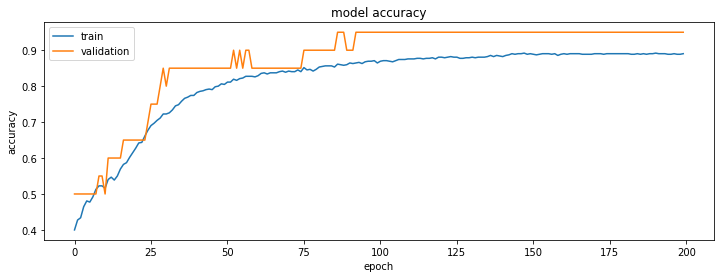

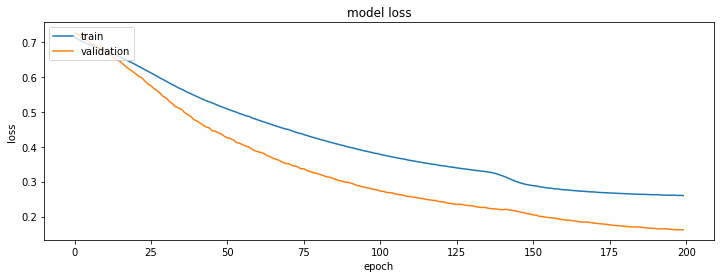

In [228]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


## Analyze the results.

1.   Print a summary of the model - use the model's class function **summary()**. How many parameters does the model have? Is a big or a small model?

The model have only 32 parameters, this model is quite small.

2.   What was the accuracy we obtained at the end of the training? Do you use the training or validation accuracy to answer?

If we are asking for the accuracy specifically at the end of the training, we have arround 0.9, but if we ask for the accuracy of the model, we usually give the result on the validation set, which arround the same (0.9)

3. If you run the model several times, do you always obtain the same accuracy?

No, when we run the all model several times, the accuracy and the loss function changes, even though we have almost the same final values, the functions themselves are different.

In [229]:
print (model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


## print the confusion matrix obtained on the test dataset.

Use the **confusion_matrix()** function provided in **sklearn.metrics**.

In [230]:
y_test_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix (np.argmax(y_test,axis=1), np.argmax(y_test_pred,axis=1))
print (CM)


[[78  9]
 [ 4 69]]


Normalize the confusion matrix to show graphically the prediction probability map.

Hint: The confusion matrix needs to be normalized by the counts of each class. Print the counts of elements in each class in the test dataset. Use the numpy function **unique()** to count the elements in y_test.

[87 73]


Text(0.5, 0, 'predicted label')

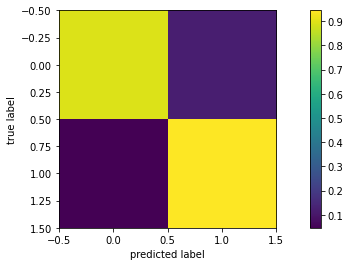

In [231]:
_,count = np.unique(np.argmax(y_test,axis=1),return_counts=True)
print (count)
CM = CM/count
CM = np.round(1000*CM)/1000
plt.figure('confusion matrix')
ax = plt.imshow(CM); plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')

Evaluate the model on the test dataset. What is the accuracy on the test dataset? Use the model's class function **evaluate()**.

We have an accuracy of 0.9 and a loss of 0.2239

In [232]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print ("The loss and accuracy on the test dataset : %f, %f"%(test_loss,test_accuracy))


5/5 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9187
The loss and accuracy on the test dataset : 0.201993, 0.918750


##plot the decision boundary of the classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()


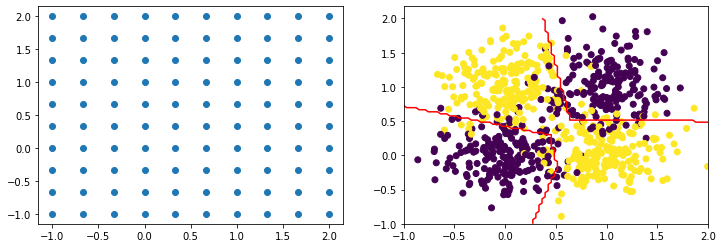

In [233]:
 NN = 10
XX,YY = np.meshgrid(np.linspace(-1,2,NN),np.linspace(-1,2,NN))
plt.subplot(121); plt.rcParams["figure.figsize"] = (12,4)
plt.scatter (XX,YY)
NN = 100
XX,YY = np.meshgrid(np.linspace(-1,2,NN),np.linspace(-1,2,NN))
XX_vector = np.vstack((np.ravel(XX),np.ravel(YY))).transpose()
Y_grid_pred = np.argmax(model.predict(XX_vector),axis=1)
plt.subplot(122); plt.rcParams["figure.figsize"] = (12,4)
plt.scatter (X[:,0],X[:,1],c=np.argmax(Y,axis=1))
plt.contour (XX,YY,Y_grid_pred.reshape(XX.shape),[0],colors='red')


## **Conclusions:**
Conclude your report by answering the following questions:

1. Did your training converge? 
2. Was the training successful? 
3. Report the confusion matrix.
4. What is the minimum of neurons you need in the hidden layer?

1, The training converged toward an accuracy of 0.9

2, Yes, the training was successful, the validation score stayed arround the training score, which means that we have no overfitting and that the results are quite goo.

3, The confusion matrix shows us that the model is good, we have 79% and 81% of correct prediction with our model.

4, Only one hidden layer is needed, at first, we have 6 neurons inside the layer, and it works pretty well, It also works with 4 neurons. With only 2 or 3 neurons, the results starts to be less accurate, 0.85 and the boundaries chosen by the model are different, they still work but not as well as before.
And with 1 neuron, the model doesn't work well, the accuracy drops to 0.7, we have only one boundary and it is not really well placed.

the minimum would be 2 neurons to at least having a working hidden layer to have satisfactory results, but 4 is needed to have good results (at least for this type of data).




In [234]:
from google.colab import drive
base_working_dir = '/content/drive/My Drive/Colab Notebooks'
drive.mount('/content/drive')
# !sudo apt-get install texlive-xetex texlive-fonts-recommended, texlive-generic-recommended
# !jupyter nbconvert --to pdf --template "drive/My Drive/Colab Notebooks/MBE DL,course/hidecode.tplx" "drive/My Drive/Colab Notebooks/MBE DL course/exercise_1_assignment.ipynb" >/dev/null 2>/dev/null
!jupyter nbconvert --to pdf "drive/My Drive/Colab Notebooks/AMIOT-exercise_1_solution.ipynb" >/dev/null 2>/dev/null

Mounted at /content/drive


In [235]:
!jupyter nbconvert --to pdf "drive/My Drive/Colab Notebooks/AMIOT-exercise_1_solution.ipynb" >/dev/null 2>/dev/null